In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000354869"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000354869
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,FIRSTMERIT CORP /OH/
Ticker,FMER


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,15.0,1.693133e+01,9.134852e-01,15.0,1.623000e+01,1.705000e+01,1.759000e+01,1.834000e+01
interest income,51.0,1.529570e+08,3.420903e+07,92915000.0,1.282980e+08,1.419590e+08,1.810025e+08,2.174970e+08
net income,53.0,3.488928e+07,1.410099e+07,6117000.0,2.915300e+07,3.116600e+07,3.828200e+07,6.389800e+07
net interest income,51.0,1.211771e+08,4.372454e+07,75805000.0,8.711100e+07,1.017020e+08,1.564910e+08,2.033400e+08
provision for loan losses,52.0,1.209342e+07,1.022412e+07,-1647000.0,6.072500e+06,1.001200e+07,1.532250e+07,4.423500e+07


# Plots

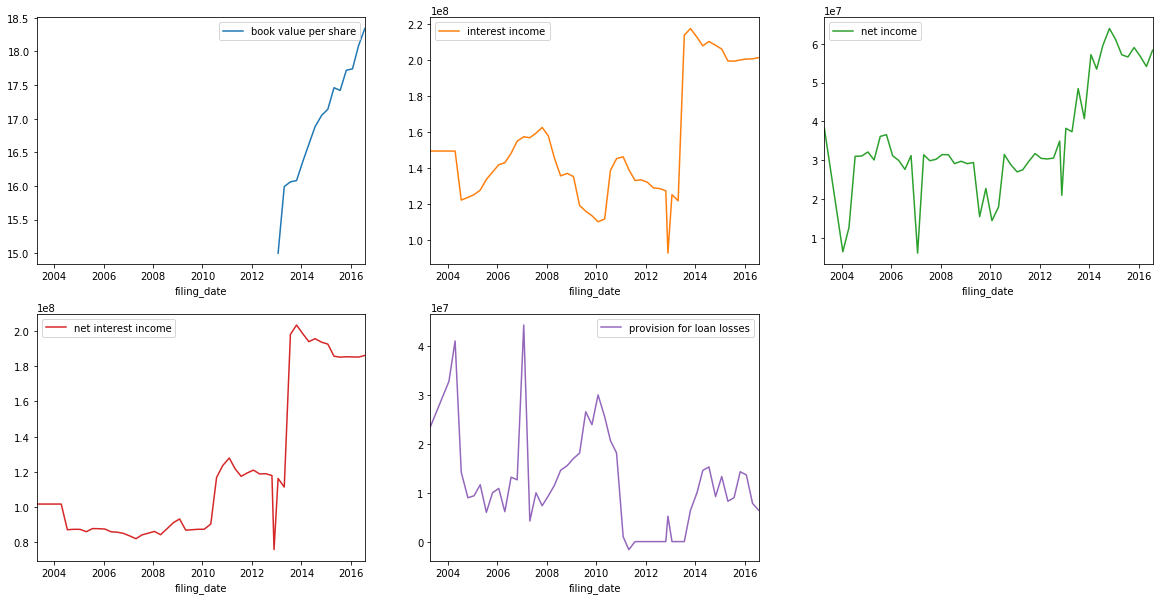

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000354869 book value per share       2003Q1 to 2012Q3: 39 periods    missing   
           interest income             2003Q2 to 2004Q1: 4 periods    missing   
           interest income                                  2012Q3  duplicate   
           net income                  2003Q2 to 2003Q3: 2 periods    missing   
           net income                                       2012Q3  duplicate   
           net interest income         2003Q2 to 2004Q1: 4 periods    missing   
           net interest income                              2012Q3  duplicate   
           provision for loan losses   2003Q2 to 2003Q3: 2 periods    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0000354869 book value per share           Missing period  
           interest income                Missing period  
           interest income              Duplicate period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           net interest income          Duplicate period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()